In [40]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn import preprocessing
from scipy.stats import norm,t,skew,kurtosis,ttest_1samp,ttest_ind


In [41]:
df=pd.DataFrame()
df=yf.download("PETR4.SA CSNA3.SA ITUB4.SA JBSS3.SA TAEE11.SA",start='2017-01-01',end='2022-01-01')["Adj Close"]

df_ret=pd.DataFrame()
df_ret["LogRetornosPetr"]=np.log(df["PETR4.SA"]/df['PETR4.SA'].shift(1))
df_ret["LogRetornosCsna"]=np.log(df["CSNA3.SA"]/df['CSNA3.SA'].shift(1))
df_ret["LogRetornosItub"]=np.log(df["ITUB4.SA"]/df['ITUB4.SA'].shift(1))
df_ret["LogRetornosJbss"]=np.log(df["JBSS3.SA"]/df['JBSS3.SA'].shift(1))
df_ret["LogRetornosTaee"]=np.log(df["TAEE11.SA"]/df['TAEE11.SA'].shift(1))
df_ret=df_ret.dropna()
peso=0.2
portfolio=pd.DataFrame((peso*df_ret["LogRetornosPetr"]+peso*df_ret['LogRetornosCsna']+peso*df_ret['LogRetornosItub']+peso*df_ret['LogRetornosJbss']+peso*df_ret['LogRetornosTaee']),columns=['Retorno'])

portfolio

[*********************100%***********************]  5 of 5 completed


,Retorno
Date,
2017-01-03 00:00:00-02:00,0.032506
2017-01-04 00:00:00-02:00,-0.002859
2017-01-05 00:00:00-02:00,0.013111
2017-01-06 00:00:00-02:00,-0.008081
2017-01-09 00:00:00-02:00,-0.002209
...,...
2021-12-23 00:00:00-03:00,0.003249
2021-12-27 00:00:00-03:00,0.006285
2021-12-28 00:00:00-03:00,0.002100


In [42]:
scaled_df=pd.DataFrame((portfolio["Retorno"]-portfolio['Retorno'].mean())/portfolio['Retorno'].std(),columns=portfolio.columns)
scaled_df

,Retorno
Date,
2017-01-03 00:00:00-02:00,1.666483
2017-01-04 00:00:00-02:00,-0.188308
2017-01-05 00:00:00-02:00,0.649295
2017-01-06 00:00:00-02:00,-0.462181
2017-01-09 00:00:00-02:00,-0.154178
...,...
2021-12-23 00:00:00-03:00,0.132053
2021-12-27 00:00:00-03:00,0.291296
2021-12-28 00:00:00-03:00,0.071823


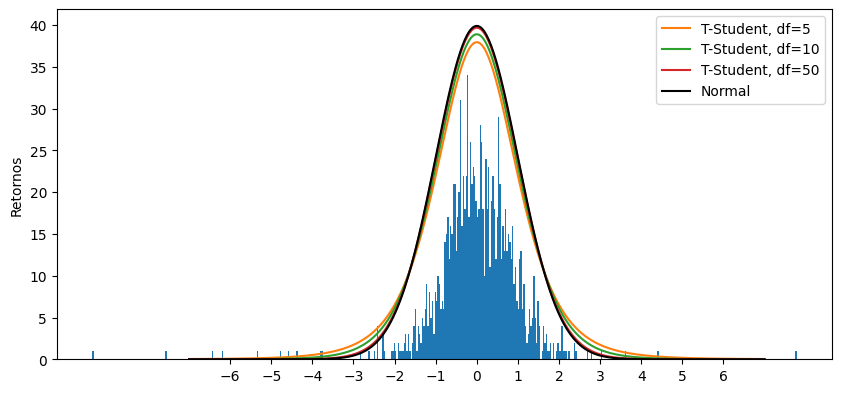

In [43]:
mu=scaled_df["Retorno"].mean()
std=np.std(scaled_df['Retorno'])
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(211,ylabel="Retornos")

ax1.hist(scaled_df,bins=500)

x2=np.linspace(mu-7*std,mu+7*std,500)
ax1.xaxis.set_ticks(np.linspace(mu-6*std,mu+6*std,13))
#Normais multiplicadas por 100 apenas para adequação gráfica
ax1.plot(x2,t.pdf(x2,5)*100, label="T-Student, df=5")
ax1.plot(x2,t.pdf(x2,10)*100,label="T-Student, df=10")
ax1.plot(x2,t.pdf(x2,50)*100,label="T-Student, df=50")
ax1.plot(x2,norm.pdf(x2,mu,std)*100,color='k',label="Normal")
plt.legend(loc='upper right')
plt.show()

In [44]:
n=0.03/np.std(portfolio['Retorno'])
1-norm.cdf(n)

0.057739796515029695

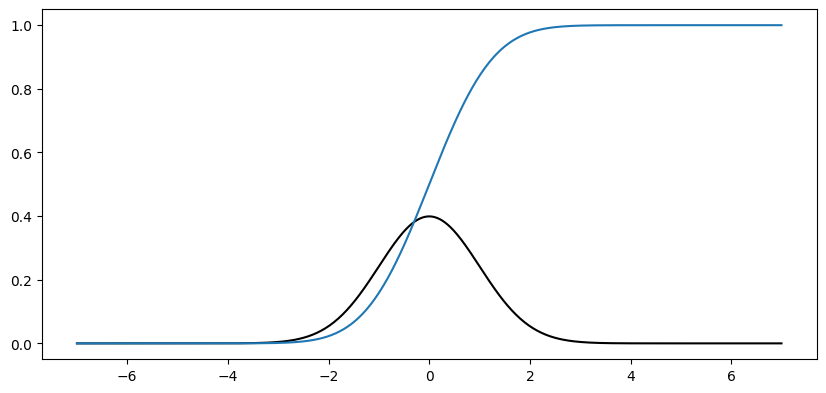

In [45]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
ax1.plot(x2,norm.pdf(x2,mu,std),color='k',label="Normal PDF")
ax1.plot(x2,norm.cdf(x2))

In [46]:
print(skew(portfolio,bias=True),kurtosis(portfolio,bias=True))

[-1.31221691] [15.31462022]


In [47]:
percentile=np.percentile(portfolio,25)
n=len(portfolio[portfolio['Retorno']<0])
percentage=n/1242
print(percentile,percentage)

-0.008452699509608962 0.4750402576489533


In [48]:
portfolio.mean(),portfolio.std()

(Retorno    0.000731
 dtype: float64,
 Retorno    0.019067
 dtype: float64)

In [80]:
df_ibov=pd.DataFrame(yf.download("^BVSP",start='2017-01-01',end='2022-01-01')["Adj Close"],columns=["Adj Close"])
df_ibov_ret=pd.DataFrame(np.log((df_ibov/df_ibov.shift(1))))

df_ibov_ret=df_ibov_ret.dropna()
df_ibov_ret

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2017-01-03 00:00:00-02:00,0.036659
2017-01-04 00:00:00-02:00,-0.003647
2017-01-05 00:00:00-02:00,0.007796
2017-01-06 00:00:00-02:00,-0.006562
2017-01-09 00:00:00-02:00,0.000567
...,...
2021-12-23 00:00:00-03:00,-0.003360
2021-12-27 00:00:00-03:00,0.006083
2021-12-28 00:00:00-03:00,-0.006340


In [85]:
t1,p1=ttest_1samp(portfolio['Retorno'],0)
t2,p2=ttest_ind(portfolio['Retorno'],df_ibov_ret['Adj Close'])
print(p1,'\n',p2)



0.1781730085459513 
 0.7075349339758569
